In [1]:
import pandas as pd
import numpy as np

In [2]:
filepath='D:/downloads/titanic/'

In [3]:
train = pd.read_csv(filepath+'train.csv')
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


데이터 분석 첫 걸음 : 탐색적 데이터 분석 (어떻게 생긴 데이터인지 이것저것 확인하는 작업)

In [5]:
train.describe(include=['O']) # object 타입에 대한 기술 통계 확인

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hocking, Mr. Richard George",male,1601,B96 B98,S
freq,1,577,7,4,644


In [10]:
survived = train[train['Survived']==1]
not_survived = train[train['Survived']==0]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [13]:
print(f'Survived : {len(survived)} {(survived.shape[0]/train.shape[0])*100:.1f}%')
print(f'Not Survived : {len(not_survived)} {(not_survived.shape[0]/train.shape[0])*100:.1f}%')
print(f'Total : {train.shape[0]}')

Survived : 342 38.4%
Not Survived : 549 61.6%
Total : 891


In [16]:
train.groupby(['Pclass','Survived']).apply(lambda x:len(x))

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [17]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

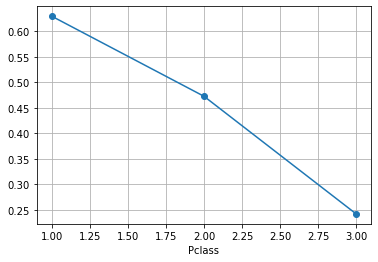

In [21]:
train.groupby('Pclass')['Survived'].mean().plot(marker='o',grid='on')

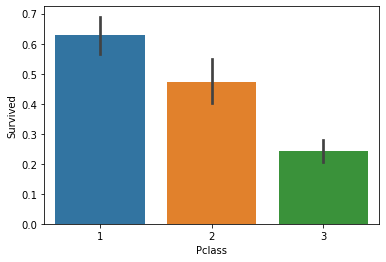

In [22]:
import seaborn as sns
sns.barplot(x='Pclass',y='Survived',data=train)

In [25]:
train.groupby(['Sex'],as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


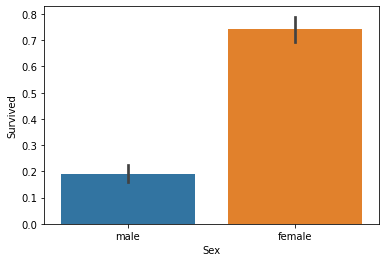

In [26]:
sns.barplot(x='Sex',y='Survived',data=train)

__CrossTable (교차행렬)__

In [29]:
pd.crosstab(train['Pclass'],train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


[seaborn API 문서](https://seaborn.pydata.org/api.html)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


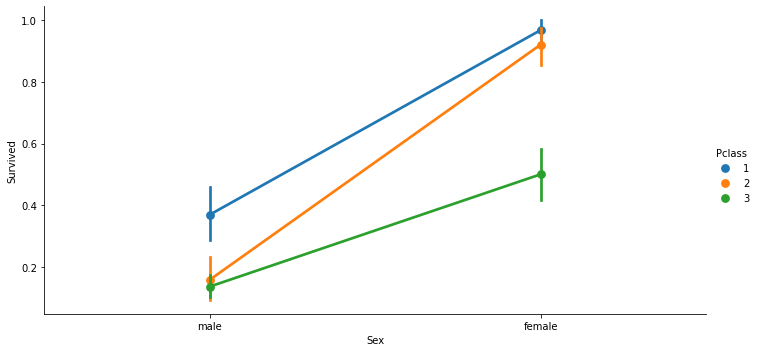

In [33]:
sns.factorplot('Sex','Survived',hue='Pclass',size=5,aspect=2,data=train)

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


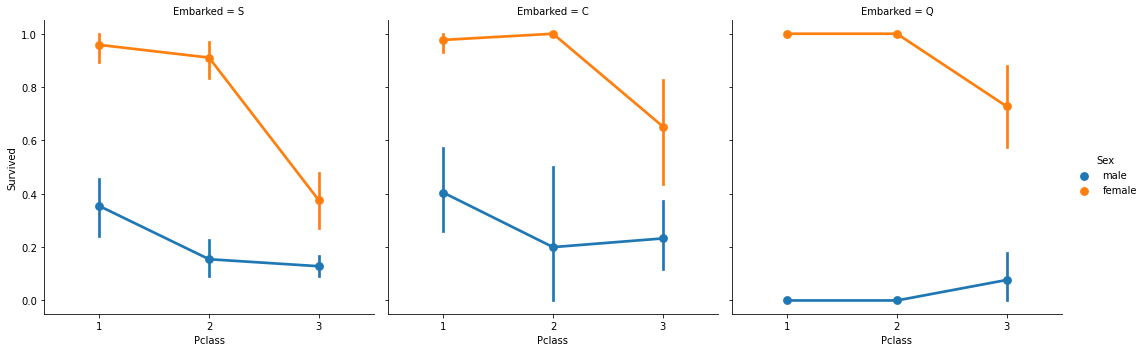

In [35]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train,col='Embarked')

In [36]:
train.groupby(['Embarked']).Survived.value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

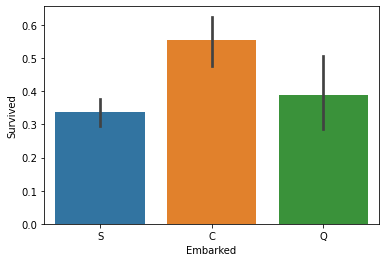

In [37]:
sns.barplot(x='Embarked',y='Survived',data=train)

In [40]:
train.groupby(['Parch'],as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


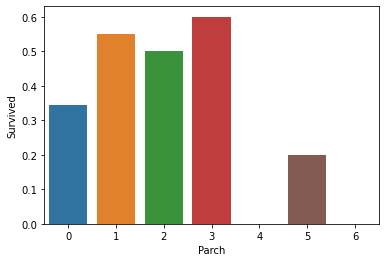

In [42]:
sns.barplot(x='Parch',y='Survived',data=train,ci=None) # ci = error 바를 없애는 옵션

In [43]:
train.groupby(['SibSp'],as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [45]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings

if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus']=False

warnings.filterwarnings("ignore")


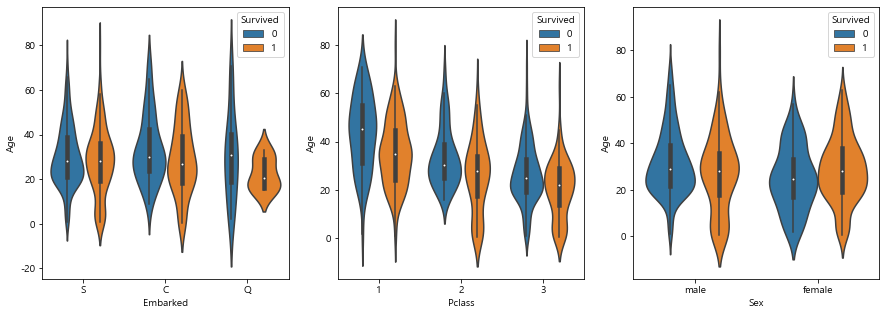

In [48]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x='Embarked',y='Age',hue='Survived',data=train,ax=ax1)
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=train,ax=ax2)
sns.violinplot(x='Sex',y='Age',hue='Survived',data=train,ax=ax3)

# 흰색 점 == 중앙값
# 중앙 굵은 선 = 사분위 범위
# 중앙 얇은 선 = 신뢰 95% 구간

In [51]:
total_survived = train[train.Survived==1]
total_not_survived = train[train.Survived==0]
male_survived = total_survived[total_survived.Sex=='male']
female_survived = total_survived[total_survived.Sex=='female']
male_not_survived = total_not_survived[total_not_survived.Sex=='male']
female_not_survived = total_not_survived[total_not_survived.Sex=='female']

__distplot : 히스토그램 , 수치형 데이터의 빈도수를 시각화 , seaborn 내장__

In [60]:
sns.set()

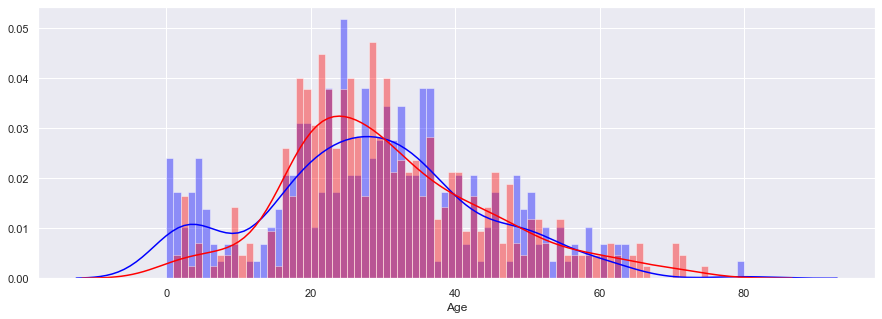

In [63]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values,kde=True,bins=range(0,81,1),color='blue')
sns.distplot(total_not_survived['Age'].dropna().values,kde=True,bins=range(0,81,1),color='red',axlabel='Age')

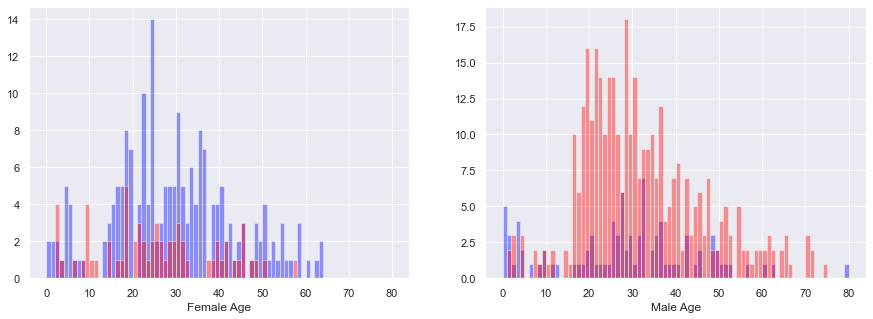

In [65]:
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values,kde=False,bins=range(0,81,1)
             ,color='blue',axlabel='Female Age')
sns.distplot(female_not_survived['Age'].dropna().values,kde=False,bins=range(0,81,1)
             ,color='red',axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values,kde=False,bins=range(0,81,1)
             ,color='blue',axlabel='Male Age')
sns.distplot(male_not_survived['Age'].dropna().values,kde=False,bins=range(0,81,1)
             ,color='red',axlabel='Male Age')

In [72]:
heat = train.drop('PassengerId',axis=1).corr()

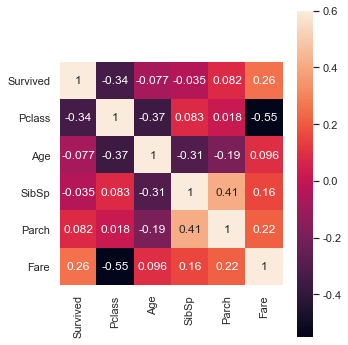

In [75]:
plt.figure(figsize=(5,6))
sns.heatmap(heat,square=True,annot=True,vmax=0.6)

In [82]:
test = pd.read_csv(filepath+'test.csv')
# Feature Engineering & category <==> numerical
train # 891 X 12
test # 418 X 11
train_test = [train,test]

In [80]:
# 호칭 추출
train.Name.str.extract(' ([a-zA-Z]+\.)')

,0
0,Mr.
1,Mrs.
2,Miss.
3,Mrs.
4,Mr.
...,...
886,Rev.
887,Miss.
888,Miss.
889,Mr.


In [121]:
for dataset in train_test:
    dataset['Title'] = dataset.Name.str.extract(' ([a-zA-Z]+\.)')

In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


In [ ]:
#3. 퀴즈

Sex  female   male
Title
-----------------
Capt  0       1
...
Miss 182      0

In [91]:
train.groupby(['Title','Sex']).size().unstack().fillna(0)

Sex,female,male
Title,,
Capt.,0.0,1.0
Col.,0.0,2.0
Countess.,1.0,0.0
Don.,0.0,1.0
Dr.,1.0,6.0
Jonkheer.,0.0,1.0
Lady.,1.0,0.0
Major.,0.0,2.0
Master.,0.0,40.0


In [92]:
pd.crosstab(train.Title,train.Sex)

Sex,female,male
Title,,
Capt.,0,1
Col.,0,2
Countess.,1,0
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40


In [122]:
for dataset in train_test:
    dataset.Title.replace(['Mlle.','Ms.'],'Miss.',inplace=True)
    dataset.Title.replace(['Lady.','Mme.'],'Mrs.',inplace=True)
    dataset.Title.replace(['Countess.','Don.','Sir.','Jonkheer.','Capt.','Major.','Col.','Rev.','Dr.'],'Other.',inplace=True)

In [114]:
train.Title.value_counts()

Mr.        517
Miss.      185
Mrs.       127
Master.     40
Other.      22
Name: Title, dtype: int64

In [108]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master.,0.575000
1,Miss.,0.702703
2,Mr.,0.156673
3,Mrs.,0.795276
4,Other.,0.318182


In [109]:
title_mapping={'Mr.':1,
              'Miss.':2,
              'Mrs.':3,
              'Master':4,
              'Other':5}

In [123]:
for dataset in train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1.0


In [124]:
for dataset in train_test:
    dataset.Sex = dataset.Sex.map({'female':1,'male':0})

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 90.6+ KB


In [126]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [127]:
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [128]:
for dataset in train_test:
    dataset.Embarked = dataset.Embarked.map({'S':0,'C':1,'Q':2})

In [129]:
train['Age'].isnull().sum()

177

In [132]:
for dataset in train_test:
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    age_null_cnt = dataset.Age.isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg-age_std,age_avg+age_std,size=age_null_cnt)
    dataset.Age[dataset.Age.isnull()] = age_null_random_list

train.Age.isnull().sum()    

0

In [133]:
for dataset in train_test:
    dataset.Fare = train.Fare.fillna(train.Fare.median())

__pd.cut , pd.qcut : 구간을 동일하게 나눔 vs 데이터 개수를 동일하게 나눔__

In [135]:
train['FareBand'] = pd.qcut(train['Fare'],4)
train[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [142]:
train['FareBand'] = pd.qcut(train['Fare'],4).values.codes
test['FareBand'] = pd.qcut(test['Fare'],4).values.codes
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,0,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,1,3.0,3


In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    float64
 13  FareBand     891 non-null    int8   
dtypes: float64(4), int64(6), int8(1), object(3)
memory usage: 91.5+ KB


In [145]:
for dataset in train_test:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean()

,FamilySize,Survived
0,2,0.343658
1,4,0.550847
2,6,0.500000
3,8,0.600000
4,10,0.000000
5,12,0.200000
6,14,0.000000


In [147]:
features_drop=['Name','SibSp','Parch','Ticket','Cabin','FamilySize']
train=train.drop(features_drop,axis=1)
test=test.drop(features_drop,axis=1)
train = train.drop(['PassengerId','AgeBand','FareBand'],axis=1)

1     324
3      52
5      33
7       3
19      2
9       2
13      1
11      1
dtype: int64

In [190]:
import pandas as pd
import numpy as np

filepath='D:/downloads/titanic/'
train = pd.read_csv(filepath+'train.csv')
test = pd.read_csv(filepath+'test.csv')

train_test = [train,test]


for dataset in train_test:
    dataset['Title'] = dataset.Name.str.extract(' ([a-zA-Z]+\.)')
    
for dataset in train_test:
    dataset.Title.replace(['Mlle.','Ms.'],'Miss.',inplace=True)
    dataset.Title.replace(['Lady.','Mme.'],'Mrs.',inplace=True)
    dataset.Title.replace(['Countess.','Don.','Sir.','Jonkheer.','Capt.','Major.','Col.','Rev.','Dr.'],'Other.',inplace=True)
    
title_mapping={'Mr.':1,
              'Miss.':2,
              'Mrs.':3,
              'Master.':4,
              'Other.':5}

for dataset in train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)

for dataset in train_test:
    dataset.Sex = dataset.Sex.map({'female':1,'male':0})
    
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
for dataset in train_test:
    dataset.Embarked = dataset.Embarked.map({'S':0,'C':1,'Q':2})
    
for dataset in train_test:
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    age_null_cnt = dataset.Age.isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg-age_std,age_avg+age_std,size=age_null_cnt)
    dataset.Age[dataset.Age.isnull()] = age_null_random_list

for dataset in train_test:
    dataset.Fare = train.Fare.fillna(train.Fare.median())

train['Age'] = pd.cut(train['Age'],5).values.codes
test['Age'] = pd.cut(test['Age'],5).values.codes
train['Fare'] = pd.qcut(train['Fare'],4).values.codes
test['Fare'] = pd.qcut(test['Fare'],4).values.codes

for dataset in train_test:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1

for dataset in train_test:
    dataset['isAlone'] = dataset.FamilySize.apply(lambda x: 0 if x>1 else 1)

In [179]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,1,1
5,6,0,3,"Moran, Mr. James",0,2,0,0,330877,1,NaN,2,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,0,0,17463,3,E46,0,1,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,2,NaN,0,0,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,0,2,347742,1,NaN,0,3,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,1,0,237736,2,NaN,1,3,2,0


In [191]:
features_drop=['Name','SibSp','Parch','Ticket','Cabin','FamilySize']
train=train.drop(features_drop,axis=1)
test=test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'],axis=1)

In [181]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [182]:
test.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,3,3,0,3,0
2,894,2,0,4,0,2,1,1
3,895,3,0,1,3,0,1,1
4,896,3,1,1,1,0,3,0


In [192]:
xTrain = train.drop('Survived',axis=1)
yLabel = train['Survived']
xTest = test.drop('PassengerId',axis=1)

In [193]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
model = DT.fit(xTrain,yLabel)
prediction = model.predict(xTest)
test['Survived']=prediction
result = test[['PassengerId','Survived']]
result.to_csv('advancedDT.csv',index=False)
print('File Saved')

File Saved


In [194]:
model.score(xTrain,yLabel)

0.8742985409652076

In [195]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1
887,1,1,1,1,2,0,2,1
888,0,3,1,2,2,0,2,0
889,1,1,0,1,2,1,1,1


In [196]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Survived
0,892,3,0,2,0,2,1,1,0
1,893,3,1,3,3,0,3,0,0
2,894,2,0,4,0,2,1,1,0
3,895,3,0,1,3,0,1,1,1
4,896,3,1,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2,0,0,1,1,0
414,1306,1,1,2,0,1,0,1,0
415,1307,3,0,2,1,0,1,1,0
416,1308,3,0,1,3,0,1,1,1
